In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
df = pd.read_csv('wine_data.csv',header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head()
print(df.head())
np.round(df.describe(),1)

   Class label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59


,Class label,Alcohol,Malic acid
count,178.0,178.0,178.0
mean,1.9,13.0,2.3
std,0.8,0.8,1.1
min,1.0,11.0,0.7
25%,1.0,12.4,1.6
50%,2.0,13.0,1.9
75%,3.0,13.7,3.1
max,3.0,14.8,5.8


<Axes: xlabel='Alcohol', ylabel='Density'>

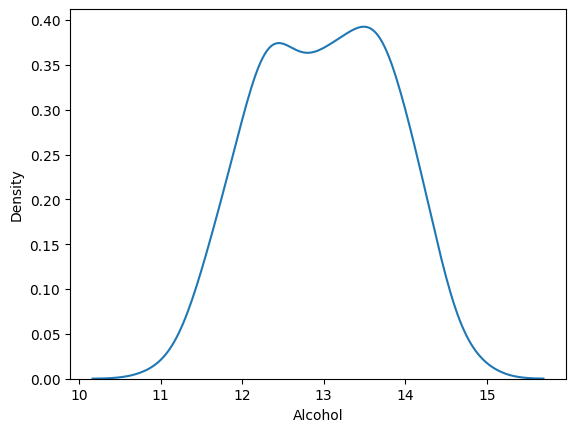

In [18]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

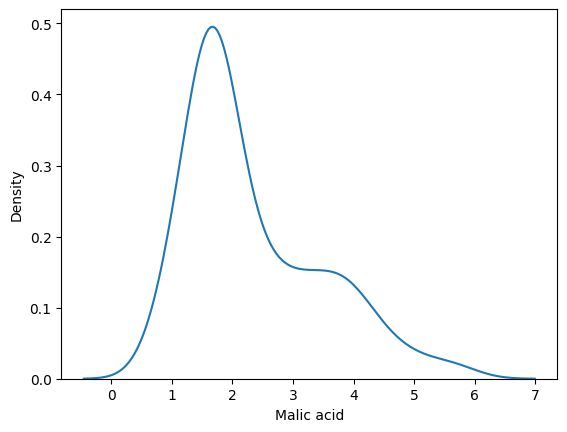

In [19]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

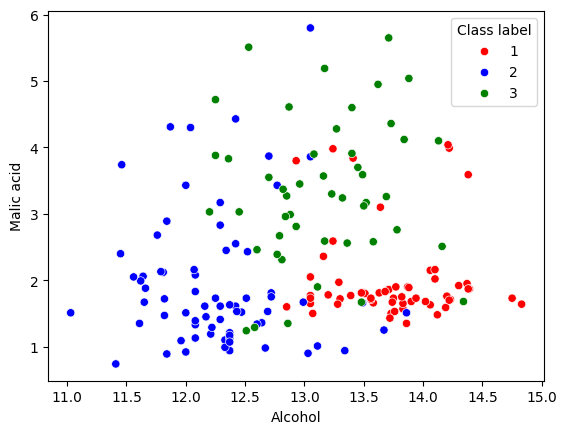

In [20]:
color_dict = {1: 'red', 2: 'blue', 3: 'green'}
sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df, palette=color_dict)

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)
    
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


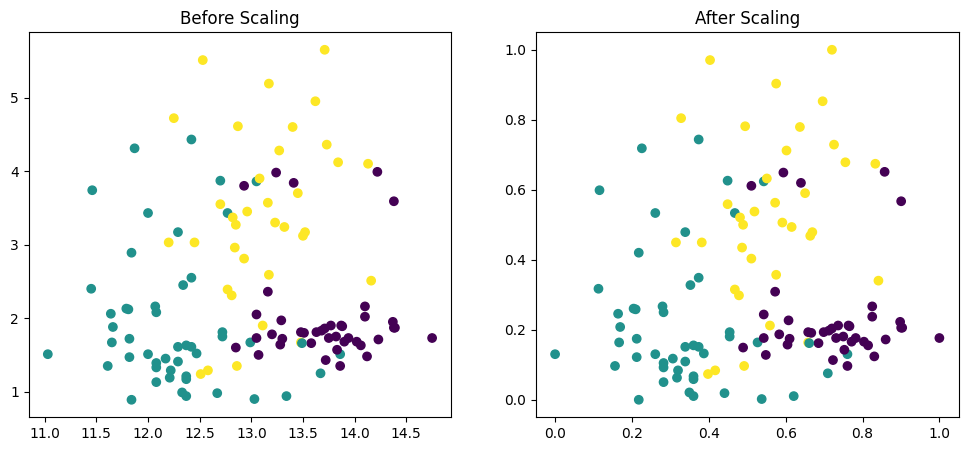

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After MinMax Scaler'}, xlabel='Alcohol', ylabel='Density'>

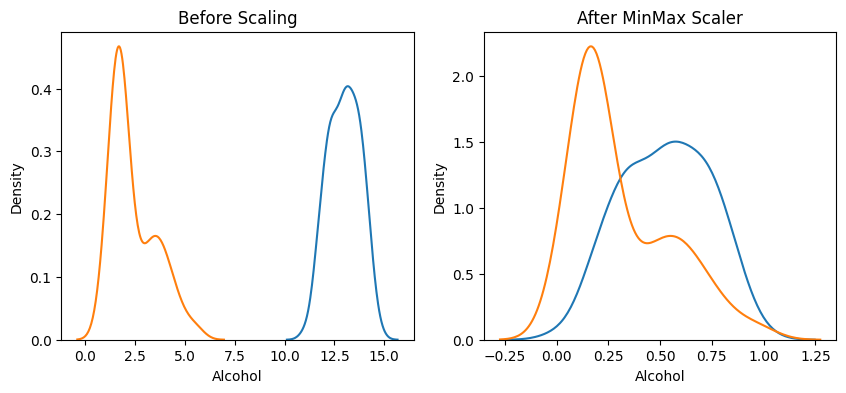

In [29]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)


<Axes: title={'center': 'Alcohol distribution After MinMax Scaler'}, xlabel='Alcohol', ylabel='Density'>

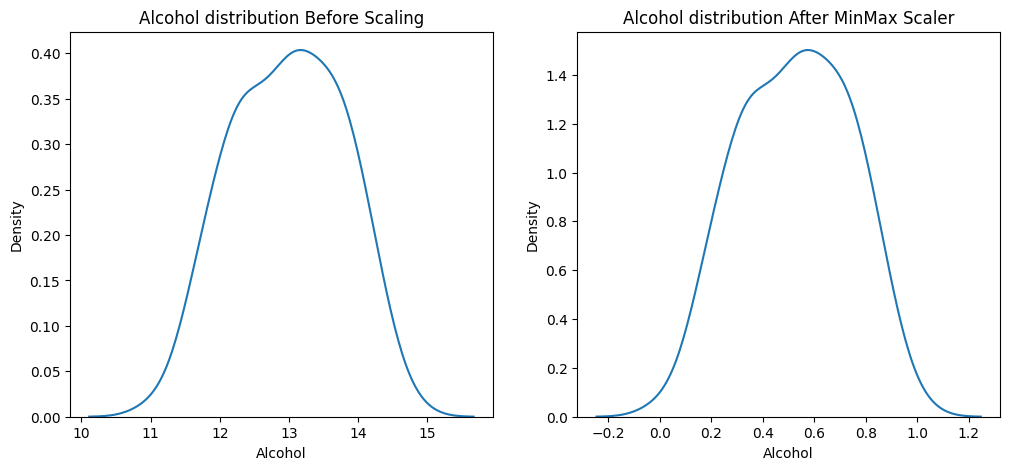

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Alcohol distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
ax2.set_title('Alcohol distribution After MinMax Scaler')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)

<Axes: title={'center': 'Malic acid distribution After MinMax Scaler'}, xlabel='Malic acid', ylabel='Density'>

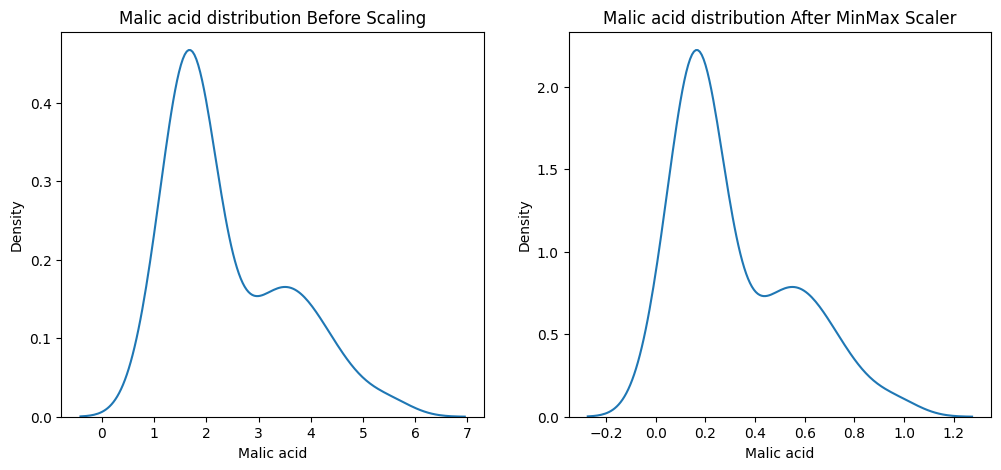

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Malic acid distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax2.set_title('Malic acid distribution After MinMax Scaler')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
